In [35]:
import pandas as pd
import numpy as np

In [36]:
df = pd.read_csv('Churn_Modelling.csv')

In [37]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [39]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [42]:
df = pd.get_dummies(df, columns=['Gender', 'Geography'], drop_first=True)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Male        10000 non-null  bool   
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2), int64(7)
memory usage: 732.5 KB


In [44]:
x = df.drop('Exited', axis=1)
y = df['Exited']

In [45]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Male,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,False,True
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,True,False,False
9996,516,35,10,57369.61,1,1,1,101699.77,True,False,False
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,True,False


In [46]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((8000, 11), (2000, 11), (8000,), (2000,))

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [49]:
x_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  0.91324755,
         1.72572313, -0.57638802],
       [-0.29729735,  0.3900109 , -1.38944225, ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -1.09499335,
        -0.57946723,  1.73494238],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -1.09499335,
        -0.57946723, -0.57638802],
       [ 0.41876609, -0.94100321, -0.3483691 , ...,  0.91324755,
        -0.57946723, -0.57638802],
       [-0.24540869,  0.00972116, -1.38944225, ...,  0.91324755,
         1.72572313, -0.57638802]])

In [50]:
import tensorflow 
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [51]:
model= Sequential()

model.add(Dense(11,activation='relu',input_dim=x_train_scaled.shape[1]))
model.add(Dense(11,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

d:\RazonCoding\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [52]:
x_train_scaled.shape[1]

11

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [55]:
history = model.fit(x_train_scaled, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7939 - loss: 0.5321 - val_accuracy: 0.7987 - val_loss: 0.4639
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7961 - loss: 0.4603 - val_accuracy: 0.8138 - val_loss: 0.4310
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8225 - loss: 0.4332 - val_accuracy: 0.8219 - val_loss: 0.4186
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8243 - loss: 0.4170 - val_accuracy: 0.8300 - val_loss: 0.4080
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8239 - loss: 0.4118 - val_accuracy: 0.8369 - val_loss: 0.3972
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8425 - loss: 0.3885 - val_accuracy: 0.8413 - val_loss: 0.3846
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8506 - loss: 0.3769 - val_accuracy: 0.8481 - val_loss: 0.3750
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8538 - loss: 0.3612 - val_accu

In [56]:
model.layers[0].get_weights()

[array([[-4.60568443e-02,  4.30461429e-02, -2.72036493e-01,
          1.09924823e-01,  4.23525162e-02,  2.16708798e-02,
          3.49199653e-01,  1.77577749e-01,  1.58884585e-01,
          4.72636428e-03, -1.15452241e-03],
        [ 2.97582988e-02,  7.54623830e-01, -9.40774739e-01,
         -6.82273090e-01, -8.61937832e-03, -6.73567891e-01,
          3.76118958e-01,  3.19991291e-01, -6.79557145e-01,
         -5.65930724e-01,  6.89798713e-01],
        [-6.50402382e-02,  1.23239309e-01, -1.84611410e-01,
          1.23404704e-01, -5.25528453e-02,  4.79723029e-02,
          5.73111065e-02, -2.95975983e-01, -1.66252911e-01,
         -1.32634519e-02,  2.60927171e-01],
        [ 3.65468711e-01, -2.74615377e-01, -9.81757045e-02,
          3.86897326e-01, -2.61888415e-01, -6.71916604e-01,
          4.29247737e-01,  1.60121635e-01, -3.28672767e-01,
         -1.24794962e-02,  2.53029726e-02],
        [ 1.30975008e+00,  8.50220144e-01,  5.12203395e-01,
         -5.66678941e-01, -1.18733490e+00, -

In [57]:
model.layers[1].get_weights()

[array([[ 0.03761693,  0.9112561 ,  0.52844244, -0.32562912, -0.6810753 ,
         -0.5075158 , -0.56639814, -0.0820025 ,  0.2175953 , -0.59245074,
          0.21519354],
        [-0.26854146,  0.7446719 ,  0.0984434 ,  0.38732597,  0.5470356 ,
         -0.48797327,  0.39507946,  0.00401477,  0.33784065, -0.17872928,
          0.17044456],
        [-0.6329145 ,  0.536324  , -0.19940458, -0.16367814,  0.5674774 ,
          0.07233318,  0.15572862,  0.3813548 ,  0.47505003, -0.33707955,
          0.18384586],
        [ 0.43722275, -0.15591098, -0.6027891 ,  0.04301078, -0.30922952,
          0.43170825,  0.01107892,  0.10854284,  0.09972897,  0.61151224,
         -0.46000287],
        [-0.20142241,  0.9095919 ,  0.6779215 , -0.20963283, -0.5970925 ,
         -0.5184869 ,  0.33930764,  0.02210071,  0.18669087,  0.18160355,
         -0.42336518],
        [-0.65600145, -0.29308298,  0.4333572 ,  0.5540942 ,  0.268051  ,
          0.45286188,  0.5698344 ,  0.4039018 ,  0.1788784 , -0.1965292

In [58]:
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [59]:
y_pred = np.where(y_log>0.5,1,0)

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)*100

86.4

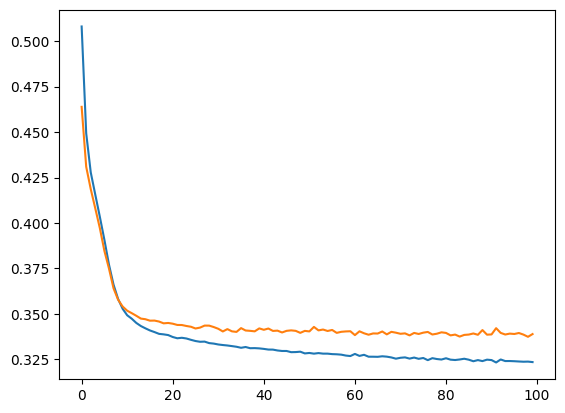

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

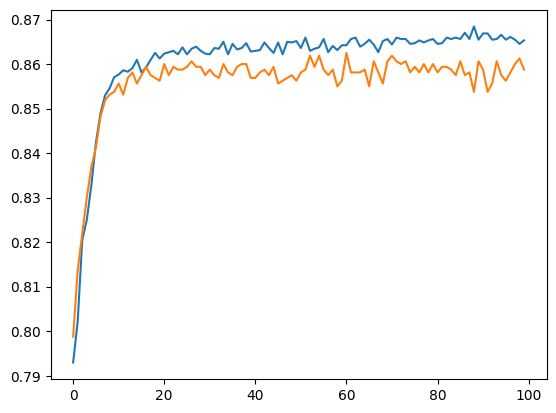

In [63]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])